In [1]:
#Dependancies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Load Data  
load_AirlineDelayData = 'AirportDelays/delay.csv'
AirlineDelayData = pd.read_csv(load_AirlineDelayData)

#Create path to output clean data to .csv all airline carriers
AirlineDelayEntireDS_CleanOutput = Path('AirportDelays/delayCleanDataEntireDS.csv')
AirlineDelayEntireDS_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 

#Create path to output clean data to .csv for the 5 specified AirlineCarriers
AirlineDelay5Carriers_CleanOutput = Path('AirportDelays/delayCleanData5CarriersDS.csv')
AirlineDelay5Carriers_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 

##Create path to output clean data to .csv for the 10 specified Airports
AirlineDelayAirports_CleanOutput = Path('AirportDelays/delayCleanData10AirportDS.csv')
AirlineDelayAirports_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 



In [3]:
#Create DataFrame and Remove all NaN Values and Reset Index IDs
df_AirlineDelay = pd.DataFrame(AirlineDelayData)
df_AirlineDelayCleanDS = df_AirlineDelay.dropna().reset_index(drop=True)
df_AirlineDelayCleanDS 
#Place Data into CSV file
df_AirlineDelayCleanDS.to_csv(AirlineDelayEntireDS_CleanOutput)

In [4]:
"""#Rename the columns in the original dataframe to be easier to read.  Use the updated column names for programming.
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"year": "Year"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"month": "Month"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier": "Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_name": "Airline_Name"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport": "Airport"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport_name": "Airport_Name"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_flights": "Arrived"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_del15": "Delayed"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_ct": "D-Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"weather_ct": "D-Weather"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"nas_ct": "D-NAS"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"security_ct": "D-Security"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"late_aircraft_ct": "D-Late_Plane"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_cancelled": "Cancelled"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_diverted": "Diverted"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_delay": "Time Delay"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_delay": "Time-Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"weather_delay": "Time-Weather"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"nas_delay": "Time-NAS"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"security_delay": "Time-Security"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"late_aircraft_delay": "Time-Late_Plane"})
#print(df_AirlineDelayEntireDS_CleanOutput)
"""

'#Rename the columns in the original dataframe to be easier to read.  Use the updated column names for programming.\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"year": "Year"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"month": "Month"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier": "Airline"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_name": "Airline_Name"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport": "Airport"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport_name": "Airport_Name"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_flights": "Arrived"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutp

In [5]:
# REVIEWED

#Checking DataTypes that exists in data set
print(df_AirlineDelayCleanDS.dtypes)

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [6]:
#Total # of Delayed/Cancelled/Diverted Flights for all years for all carriers
# arr_flights            float64
# arr_del15              float64
# arr_cancelled          float64
# arr_diverted           float64
# arr_del15 / arr_flights show as %
# arr_cancelled / arr_flights show as %
# arr_diverted / arr_flights show as %

#Refined entire dataset to "year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df2_AirlineDelayCleanDS_Status = df_AirlineDelayCleanDS[["year","arr_flights","arr_del15","arr_cancelled","arr_diverted"]]

#Aggregated Data by Year 
df2_AirlineDelayCleanDS_Status_Rollup = df2_AirlineDelayCleanDS_Status.groupby(["year"]).sum()
#Calculate % amounts
df2_AirlineDelay_ArrDel15 = (df2_AirlineDelayCleanDS_Status_Rollup['arr_del15'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_ArrCancel = (df2_AirlineDelayCleanDS_Status_Rollup['arr_cancelled'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_diverted = (df2_AirlineDelayCleanDS_Status_Rollup['arr_diverted'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100

####

df2_AirlineDelayCleanDS_Status_Rollup["% Delayed"] = round(df2_AirlineDelay_ArrDel15,2) 
df2_AirlineDelayCleanDS_Status_Rollup["% Cancelled"] = round(df2_AirlineDelay_ArrCancel,2) 
df2_AirlineDelayCleanDS_Status_Rollup["% Diverted"] = round(df2_AirlineDelay_diverted,2)

print(f"---Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2003 to 2022)---")
df2_AirlineDelayCleanDS_Status_Rollup
# df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
# df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToH

#Table 1


---Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2003 to 2022)---


,arr_flights,arr_del15,arr_cancelled,arr_diverted,% Delayed,% Cancelled,% Diverted
year,,,,,,,
2003,3815798.0,653971.0,52926.0,7049.0,17.14,1.39,0.18
2004,7129270.0,1421391.0,127757.0,13784.0,19.94,1.79,0.19
2005,7139339.0,1465586.0,133688.0,14021.0,20.53,1.87,0.20
2006,7141922.0,1615537.0,121934.0,16186.0,22.62,1.71,0.23
2007,7455458.0,1804028.0,160809.0,17182.0,24.20,2.16,0.23
2008,7009706.0,1524735.0,137429.0,17248.0,21.75,1.96,0.25
2009,6450279.0,1218288.0,89372.0,15462.0,18.89,1.39,0.24
2010,6450109.0,1174884.0,113247.0,15474.0,18.21,1.76,0.24
2011,6084838.0,1109763.0,115950.0,14395.0,18.24,1.91,0.24


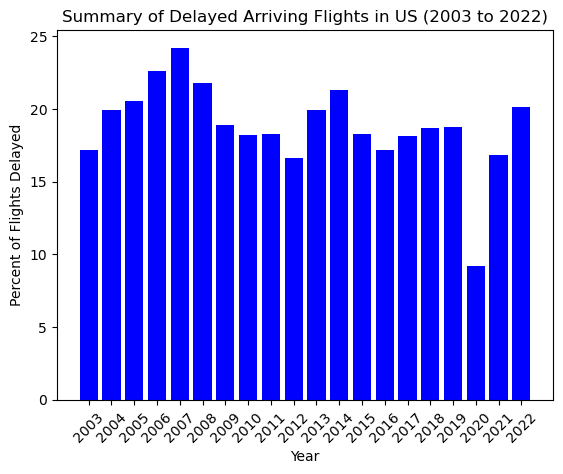

In [25]:
# Bar chart of the Percent Delayed column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Delayed"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='b', align='center')


# Include plot title and axis labels
plt.title("Summary of Delayed Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Delayed")
plt.xticks(range(2003,2023))
plt.xticks(rotation=45)

plt.show()

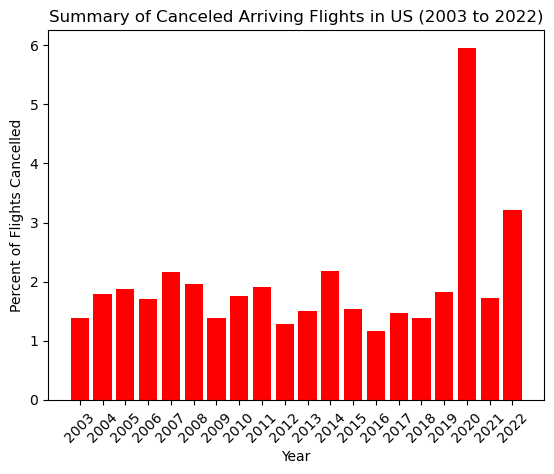

In [24]:
# Bar chart of the Percent Canceled column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Cancelled"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='r', align='center')


# Include plot title and axis labels
plt.title("Summary of Canceled Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Cancelled")
plt.xticks(range(2003,2023))
plt.xticks(rotation=45)

plt.show()

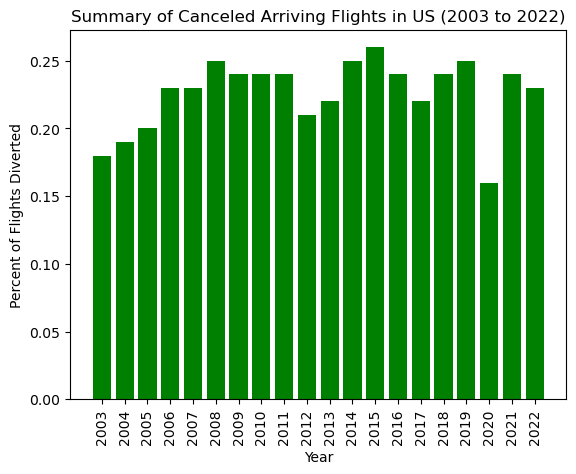

In [26]:
# Bar chart of the Percent Diverted column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Diverted"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='g', align='center')


# Include plot title and axis labels
plt.title("Summary of Diverted Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Diverted")
plt.xticks(range(2003,2023))
plt.xticks(rotation=90)

plt.show()

NameError: name 'x_axis' is not defined

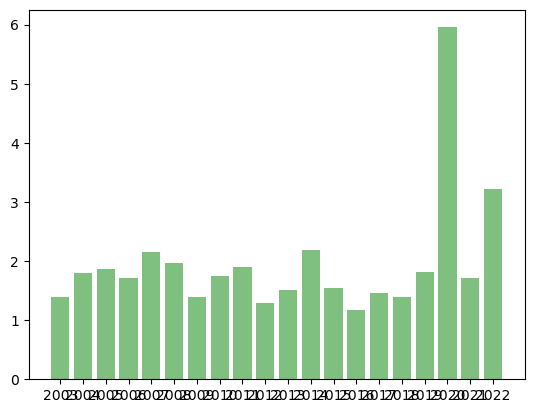

In [27]:
# From Revati - see error.  Suggest to use the one above.

# Bar chart of the Percent Diverted column
All_Years = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

plt.bar(All_Years, df2_AirlineDelay_ArrCancel, color='g', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, All_Years, rotation="vertical")

# Give our chart some labels and a tile
plt.title("Airport % Diverted")
plt.xlabel("Years")
plt.ylabel("% Diverted")

In [28]:
##Total # of Delayed/Cancelled/Diverted Flights for all years for all carriers
print(f"---------------------Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------")

df2_AirlineDelayCleanDS_Status_Rollup.tail()

# Table 2

# FOR PRESENTATION - can use this table directly in the presentation

---------------------Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------


,arr_flights,arr_del15,arr_cancelled,arr_diverted,% Delayed,% Cancelled,% Diverted
year,,,,,,,
2018,6304506.0,1179152.0,87811.0,15265.0,18.70,1.39,0.24
2019,7422029.0,1389253.0,134918.0,18879.0,18.72,1.82,0.25
2020,4685808.0,431871.0,279063.0,7730.0,9.22,5.96,0.16
2021,5995392.0,1010332.0,103055.0,14117.0,16.85,1.72,0.24
2022,2733118.0,549829.0,88134.0,6169.0,20.12,3.22,0.23


In [ ]:
#Check for distinct Airports.  These airport codes are only airports with at least 1 month with >50 weather delays by at least 1 airline carrier in 2018 to 2022
#airport codes: “PHL”,”EWR”,”LGA”,”IAD”,”ORD”,”MSP”,”DTW”,”DEN”,”SLC”,”LAX”,”SFO”,”SEA”,”ATL”,”CLT”,”BWI”,”MIA”,”DFW”,”IAH”

###########Number of Flights Delayed Due To Weather From 2003 - 2022 Per Airport (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport.


df2_AirportDelay = df_AirlineDelayCleanDS[["year","month","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df3_AirportDelay = df2_AirportDelay[df2_AirportDelay["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
df4_AirportDelay_refinedAirports = df3_AirportDelay.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df5_AirportDelay_2003to2022 = pd.DataFrame(df4_AirportDelay_refinedAirports.groupby(["year","airport"]).sum())

print(f"---------------------Number of Flight Delays for Any Reason in US in Selected Airports (2003 to 2022)-----------")
df5_AirportDelay_2003to2022


# Table 3

In [ ]:
# NOTE TO TEAM - SOMETHING IS WRING WITH THIS CODE.  
# It shows each ariport, but the average is not calculating per year or even the average for the 20 years.  Can someone please check?

# Calculate summary statistics for each airport for the whole 20-year period.  
group_AllAirports_stat = df5_AirportDelay_2003to2022.groupby("airport")
summary_Airports_allyears_stat = group_AllAirports_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

summary_Airports_allyears_stat = summary_Airports_allyears_stat.sort_values(by = ['mean'], ascending = False) 

#summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
                     #   'median': 'Median',
                     #   'var': 'Variance',
                     #   'std': 'Standard Deviation',
                     #   'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_Airports_allyears_stat)

# This shows the average number of dealys for any reason at all airports per year in US  
# *** FOR PRESENTATION ***
# What is the average number of delayed flights each year at each airport?  Plot the year, mean and SD.
# Insight:  Over the past 20 years, highest average delays are in Atlanta, Chicago, Dallas, Los Angeles and Denver. 

In [ ]:
# Calculate summary statistics for each airport for the 5 year period 1028 to 2022 period.  

#Refine Data for years b/w 2018 and 2022
group_AllAirports_18to22 = group_AllAirports_stat[(group_AllAirports_stat["year"]>= 2018) &  
                                                                    (group_AllAirports_stat["year"] <= 2022) 
                                                                   ]
group_AllAirports_18to22_stat = group_AllAirports_18to22.groupby("airport")
summary_Airports_stat = group_AllAirports_18to22_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

summary_Airports_stat = summary_Airports_stat.sort_values(by = ['mean'], ascending = False) 

#summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
                     #   'median': 'Median',
                     #   'var': 'Variance',
                     #   'std': 'Standard Deviation',
                     #   'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_Airports_allyears_stat)

# This shows the average number of dealys for any reason at all airports per year in US  
# *** FOR PRESENTATION ***
# What is the average number of delayed flights each year at each airport?  Plot the year, mean and SD.
# Insight:  Over the past 20 years, highest average delays are in Atlanta, Chicago, Dallas, Los Angeles and Denver. 



In [ ]:
# Calculate summary statistics for each airline for the whole 20-year period.  
#Refine Data for years b/w 2018 and 2022
df_AirlineDelayCleanDS18to22 = df_AirlineDelayCleanDS[(df_AirlineDelayCleanDS["year"]>= 2018) &  
                                                                    (df_AirlineDelayCleanDS["year"] <= 2022) 
                                                                   ]

group_AllAirlines_stat = df_AirlineDelayCleanDS18to22.groupby("carrier_name")
summary_AllAirlines_5years_stat = group_AllAirlines_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

summary_AllAirlines_5years_stat = summary_AllAirlines_5years_stat.sort_values(by = ['mean'], ascending = False) 

#summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
                     #   'median': 'Median',
                     #   'var': 'Variance',
                     #   'std': 'Standard Deviation',
                     #   'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_AllAirlines_allyears_stat)

# Use this to show how we identified the airlines with the most delays over the 20-year period.  
# What is the average number of delayed flights for each airline over all 20 years

In [ ]:
#Refine Data for years b/w 2018 and 2022
df_AirlineCarrierDelay5yrs_refined = df_AirlineCarrierDelay_refined[(df_AirlineCarrierDelay_refined["year"]>= 2018) &  
                                                                    (df_AirlineCarrierDelay_refined["year"] <= 2022) 
                                                                   ]
#Refine data for specified columns                             
df_AirlineCarrierDelay5yrs_refined_cols = df_AirlineCarrierDelay5yrs_refined[["year","month","carrier_name","airport","airport_name","arr_flights","arr_del15",
                                                                              "carrier_ct", "weather_ct", "nas_ct","security_ct", "late_aircraft_ct","arr_cancelled",
                                                                              "arr_diverted","arr_delay", "carrier_delay", "weather_delay", "nas_delay","security_delay", 
                                                                              "late_aircraft_delay"
                                                                             ]] 

#shows 1 row for each month that an airline carrier had arriving flihgts at an airport
print(f"-----Summary of all arriving flights in US for 5 largest US arlines (per month per airport) (2018 to 2022)-----")
                         
df_AirlineCarrierDelay5yrs_refined_cols                       

# Table 5

In [ ]:
#####Total # of Delayed/Cancelled/Diverted Flights for 5 years for all carriers Rollup#########
#Last 5 years 
#df_AirlineCarrierDelay_Status_Status_Rollup.tail()
# arr_flights            float64
# arr_del15              float64
# arr_cancelled          float64
# arr_diverted           float64
# arr_del15 / arr_flights show as %
# arr_cancelled / arr_flights show as %
# arr_diverted / arr_flights show as %

#Refined entire dataset to "year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df_AirlineCarrierDelay_Status = df_AirlineCarrierDelay5yrs_refined_cols[["year","arr_flights","arr_del15","arr_cancelled","arr_diverted","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]]

#Aggregated Data by Year 
df_AirlineCarrierDelay_Status_Rollup = df_AirlineCarrierDelay_Status.groupby(["year"]).sum()
#Calculate % amounts
df2_AirlineDelay_ArrDel15 = (df_AirlineCarrierDelay_Status_Rollup['arr_del15'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_ArrCancel = (df_AirlineCarrierDelay_Status_Rollup['arr_cancelled'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_diverted = (df_AirlineCarrierDelay_Status_Rollup['arr_diverted'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100

####

df_AirlineCarrierDelay_Status_Rollup["% Delayed"] = df2_AirlineDelay_ArrDel15 
df_AirlineCarrierDelay_Status_Rollup["% Cancelled"] = df2_AirlineDelay_ArrCancel 
df_AirlineCarrierDelay_Status_Rollup["% Diverted"] = df2_AirlineDelay_diverted


# Show aggrgegate delays from 2018 to 2022 in US only.  Includes data for ALL airlines

df_Delay_Cancel_Divert_Total = df_AirlineCarrierDelay_Status[["year","arr_flights","arr_del15","arr_cancelled","arr_diverted"]]

print(f"------------Number of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------")


df_Delay_Cancel_Divert_Total

# df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
# df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToH

# Table 6

In [ ]:
#Refined entire dataset to "year","arr_flights","arr_del15",all reasons for delays and % each delay contributed to toal # flight delays
df_Delay_AnyReasonPercent = df_AirlineCarrierDelay_Status[["year","arr_flights","arr_del15","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]]

#Aggregated Data by Year 
# #Calculate % amounts
df2_AirlineDelay_AllDelays_Rollup = df_Delay_AnyReasonPercent.groupby(["year"]).sum()

df2_AirlineDelay_ArrDel15 = (df2_AirlineDelay_AllDelays_Rollup['arr_del15'] / df2_AirlineDelay_AllDelays_Rollup['arr_flights'])*100
df2_AirlineDelay_Carrier = (df2_AirlineDelay_AllDelays_Rollup['carrier_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_Weather = (df2_AirlineDelay_AllDelays_Rollup['weather_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_NAS = (df2_AirlineDelay_AllDelays_Rollup['nas_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_Security = (df2_AirlineDelay_AllDelays_Rollup['security_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_late_aircraft = (df2_AirlineDelay_AllDelays_Rollup['late_aircraft_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100

####

df2_AirlineDelay_AllDelays_Rollup["% Delayed"] = round(df2_AirlineDelay_ArrDel15,2) 
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_Carrier,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_Weather,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_NAS,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_Security,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_late_aircraft,2)



print(f"---Number (%) of Delayed Arriving Flights as % of Total Delayed Flights Per Reason Reason for Delay in US (2018 to 2022)---")


df2_AirlineDelay_AllDelays_Rollup

#Tabe 7

In [ ]:
##################Find total the # of arrival delays per airline per year ############################
df_AirlineCarrierDelay_PerYear = pd.DataFrame(df_AirlineCarrierDelay5yrs_refined_cols.groupby(["carrier_name","year"]).sum()["arr_del15"])
    
print(f"----Number of Delayed Arriving Flights for Any Reason in US Per Airline Per Year for each of the 5 Biggest US Airlines (2018 to 2022)-----")


df_AirlineCarrierDelay_PerYear

# Table 8

In [ ]:
###########Total Delayed Flights For Any Reason For 5 Biggest Airlines########
#Refined  dataset (for the 5 carriers for 5 years) to "year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df_AirlineDelay_5CarrierReasons = df_AirlineCarrierDelay5yrs_refined_cols[["year","airport","carrier_name","arr_flights","arr_del15","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct" ]]

#Aggregated Data by Year 
df_AirlineDelay_5CarrierReasons_Rollup = df_AirlineDelay_5CarrierReasons.groupby(["year"]).sum()

# #Calculate % amounts
df2_AirlineDelay_5CarrierDel15 = (df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_flights'])*100
df2_AirlineDelay_5Carrier = (df_AirlineDelay_5CarrierReasons_Rollup['carrier_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierWeather = (df_AirlineDelay_5CarrierReasons_Rollup['weather_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierNAS = (df_AirlineDelay_5CarrierReasons_Rollup['nas_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierSecurity = (df_AirlineDelay_5CarrierReasons_Rollup['security_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5Carrierlate_aircraft = (df_AirlineDelay_5CarrierReasons_Rollup['late_aircraft_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100


###Adding new columns which holds percentage amounts 
df_AirlineDelay_5CarrierReasons_Rollup["% Any Delayed"] =  round(df2_AirlineDelay_5CarrierDel15,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_5Carrier,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_5CarrierWeather,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_5CarrierNAS,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_5CarrierSecurity,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_5Carrierlate_aircraft,2)

print(f"-----Total (%) Delayed Flights For Any Reason For 5 Biggest Airlines (Aggregated) (2018 to 2022)---------")
df_AirlineDelay_5CarrierReasons_Rollup

# Table 9

In [ ]:
# Refine Table 8 grouping it by airline

#Aggregated Data by Year 
df_AirlineDelay_5CarrierReasons_Rollup = df_AirlineDelay_5CarrierReasons.groupby(["carrier_name","year"]).sum()

# #Calculate % amounts
df2_AirlineDelay_5CarrierDel15 = (df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_flights'])*100
df2_AirlineDelay_5Carrier = (df_AirlineDelay_5CarrierReasons_Rollup['carrier_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierWeather = (df_AirlineDelay_5CarrierReasons_Rollup['weather_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierNAS = (df_AirlineDelay_5CarrierReasons_Rollup['nas_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierSecurity = (df_AirlineDelay_5CarrierReasons_Rollup['security_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5Carrierlate_aircraft = (df_AirlineDelay_5CarrierReasons_Rollup['late_aircraft_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100


###Adding new columns which holds percentage amounts 
df_AirlineDelay_5CarrierReasons_Rollup["% Any Delayed"] =  round(df2_AirlineDelay_5CarrierDel15,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_5Carrier,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_5CarrierWeather,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_5CarrierNAS,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_5CarrierSecurity,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_5Carrierlate_aircraft,2)

df_5CarrierDelayrPercent = df_AirlineDelay_5CarrierReasons_Rollup[["arr_flights","arr_del15","% Any Delayed","% Delayed d/t Airline","% Delayed d/t Weather", "% Delayed d/t NAS","% Delayed d/t Security","% Delayed d/t Late Aircraft"]]

print(f"-----Total (%) Delayed Flights For Any Reason Per Airline For 5 Biggest Airlines (Aggregated) (2018 to 2022)------")
df_5CarrierDelayrPercent

# Table 10


In [ ]:
#Check for distinct Airports.  These airport codes are only airports with at least 1 month with >50 weather delays by at least 1 airline carrier in 2018 to 2022
#airport codes: “PHL”,”EWR”,”LGA”,”IAD”,”ORD”,”MSP”,”DTW”,”DEN”,”SLC”,”LAX”,”SFO”,”SEA”,”ATL”,”CLT”,”BWI”,”MIA”,”DFW”,”IAH”

#######Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport.


df2_AirportDelay = df_AirlineDelayCleanDS[["year","month","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df3_AirportDelay = df2_AirportDelay[df2_AirportDelay["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
#Refine Data for years b/w 2018 and 2022
df_Airport_anyreason_2018to2022 = df3_AirportDelay[(df3_AirportDelay["year"]>= 2018) &(df3_AirportDelay["year"] <= 2022)]

df4_AirportDelay_refinedAirports_2018to2022 = df_Airport_anyreason_2018to2022.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df5_AirportDelay_2018to2022 = pd.DataFrame(df4_AirportDelay_refinedAirports_2018to2022.groupby(["year","airport"]).sum())

df5_AirportDelay_2018to2022[["arr_flights", "arr_del15", "carrier_ct","weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

print(f"----------Number of Flight Delays for Any Reason in US in Selected Airports (2018 to 2022)----------")
df5_AirportDelay_2018to2022

# Table 11

In [ ]:
###########Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport and Airline (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport for the 5 airlines.
#airline, then airport

df2_AirlineCarrierDelay5yrs_refined_cols = df_AirlineCarrierDelay5yrs_refined_cols[["year","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df_AirlineCarrierDelay5yrs_refinedAirports = df2_AirlineCarrierDelay5yrs_refined_cols[ 
                                                                                    df2_AirlineCarrierDelay5yrs_refined_cols["airport"].isin([
                                                                                                                                             'PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
df2_AirlineCarrierDelay5yrs_refinedAirports = df_AirlineCarrierDelay5yrs_refinedAirports.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df_AirportDelayGreater50 = df2_AirlineCarrierDelay5yrs_refinedAirports[(df2_AirlineCarrierDelay5yrs_refinedAirports["weather_ct"] >= 50)]
df2_AirportDelayGreater50 = pd.DataFrame(df_AirportDelayGreater50.groupby(["year","airport","carrier_name"]).sum())

print(f"--Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport and Airline (in months with > 50 weather delays) --")
df2_AirportDelayGreater50
#df7_AirportDelayGreater50 = df6_AirportDelay_refined[(df6_AirportDelay_refined["weather_ct"] >= 50)]

##############Validation Section#########################################################
#df_AirportDelayGreater50 ["airport"].unique()
#df_AirportDelayGreater50["year"].unique()

# Table 12

In [ ]:
#Carriers with arr_del15 > 50 per Airport
#Show the total number of months with >50 delays due to weather per month by any one of the 5 airlines


df_AirlineDelayCleanDS

df_AirlineDelayGreater50_2003to2022 = df_AirlineDelayCleanDS[(df_AirlineDelayCleanDS["weather_ct"] >= 50)]
df_AirlineDelayGreater50WeatherCt_2003to2022 = df_AirlineDelayGreater50_2003to2022.sort_values(by = ['weather_ct'], ascending = False) 
df_Airport_AllMonths50WeatherDelay = df_AirlineDelayGreater50WeatherCt_2003to2022[df_AirlineDelayGreater50WeatherCt_2003to2022["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'])]
                                                                                  
df_Airport_AllMonths50WeatherDelay.groupby(["year", "month", "airport"]).sum()

# df_Airport_AllMonths50WeatherDelay     

# Table 13

In [ ]:
#Total minutes of delays in all US for delayed flights for 5 years any reason for 5 airline carriers
df_AirlineDelayTotalMins5Carriers = df_AirlineDelayGreater50WeatherCt[["year","carrier_name","arr_delay","carrier_delay","weather_delay", "nas_delay", 
                                                                       "security_delay","late_aircraft_delay"
                                                                     ]]
df_AirlineDelayTotalMins5Carriers.sort_values(by = ['arr_delay'], ascending = False)

In [ ]:
#Airline Carriers that had the highest delays for each year
df_AirlineDelayTotalMins5CarrMaxYr =df_AirlineDelayTotalMins5Carriers.groupby(df_AirlineDelayTotalMins5Carriers['year']).max()
df_AirlineDelayTotalMins5CarrMaxYr 

In [ ]:
df_AirlineDelayArrConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['arr_delay']/60
df_AirlineDelayCarrConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['carrier_delay']/60
df_AirlineDelayWeatherConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['weather_delay']/60
df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr["carrier_delay_hrs"] = df_AirlineDelayCarrConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr["weather_delay_hrs"] = df_AirlineDelayWeatherConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr

In [ ]:
#
df_AirlineDelayGreater50WeatherCt.groupby("month").max()["weather_ct"]

In [ ]:
df_AirlineDelayGreater50WeatherCt.max(axis=0)

In [ ]:
#df_AirlineDelayGreater50WeatherCt.groupby(["carrier_name","year","month"]).sum().head(20)
df_AirlineDelayGreater50WeatherCt.groupby(["carrier_name","year","month"]).sum().tail(20)

In [ ]:
df_AirlineDelayGreater50WeatherCt.to_csv(AirlineDelay_CleanOutput)